# Learning Objectives

Today we learn how to clean real data and use summary statistics to answer real world questions about the dataset

## Practicals

This is a series that can be watched to reinforce the material of data science foundations, and while I will try to make it as stand alone as possible, it will heavily lean on the foundations material.

The point of these lectures will be to dive into how to use the knowledge we gained during data science fundamentals. 

## What we know so far

As always we will start off by checking out our assumptions. In the data science foundations we will discuss why we need these assumptions and what we can use them for in theory, but here we will use them in practice.

The assumptions that we begin with are simply: we have data.

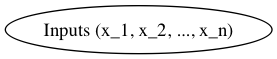

In [7]:
import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

G = nx.DiGraph()
G.add_node('Inputs (x_1, x_2, ..., x_n)')
draw(G)

## Our data

The data that we will be looking at throughout this series will be the billionaires dataset ([full details](http://www.iie.com/publications/interstitial.cfm?ResearchID=2917))

Researchers have compiled a multi-decade database of the super-rich. Building off the Forbes World's Billionaires lists from 1996-2014, scholars at Peterson Institute for International Economics have added a couple dozen more variables about each billionaire - including whether they were self-made or inherited their wealth.

While we could focus on more than one data set and have quite some fun doing so, we will focus on just one to drill down instead on the methodology and the practice of data science. So let's begin by looking at our data.

In [8]:
import pandas as pd

# Pandas has many different wrappers to read data
# But read_csv tends to be the most commonly used one
df = pd.read_csv('../data/billionaires.csv')

# The first thing I always do it do .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 22 columns):
age                  2614 non-null int64
category             2613 non-null object
citizenship          2614 non-null object
company.name         2576 non-null object
company.type         2578 non-null object
country code         2614 non-null object
founded              2614 non-null int64
from emerging        2614 non-null bool
gdp                  2614 non-null float64
gender               2580 non-null object
industry             2613 non-null object
inherited            2614 non-null bool
name                 2614 non-null object
rank                 2614 non-null int64
region               2614 non-null object
relationship         2568 non-null object
sector               2591 non-null object
was founder          2614 non-null bool
was political        2614 non-null bool
wealth.type          2592 non-null object
worth in billions    2614 non-null float64
year                

So here we get a ton of information. We have a data set with 22 columns and up to 2614 rows. Notice that some columns don't have 2614 rows filled rows and instead have some null rows. In addition we can get the types of the rows.

## Quantitative and Qualitative

We can see from above which columns are quantitative and qualitative. A good rule of thumb is that any float is a quantitative column and the rest are qualitative.

That being said it is good to inspect the columns and ask the question: can I average this. A quick visual inspection using `.head()` can help:

In [10]:
df.head(2)

,age,category,citizenship,company.name,company.type,country code,founded,from emerging,gdp,gender,...,name,rank,region,relationship,sector,was founder,was political,wealth.type,worth in billions,year
0,-1,Financial,Saudi Arabia,Rolaco Trading and Contracting Company,new,SAU,1968,True,1.580000e+11,male,...,Abdul Aziz Al-Sulaiman,404,Middle East/North Africa,founder,construction,True,False,self-made finance,1.0,1996
1,34,Financial,United States,Fidelity Investments,new,USA,1946,True,8.100000e+12,female,...,Abigail Johnson,145,North America,relation,investment banking,True,False,inherited,2.5,1996


## Describing qualitative features

We can't do too much to describe qualitative features, but one thing that we can do is to count and display the unique entries of these columns. For example, you could be interested in how most billionaires made their fortunes, the below command can tease this out (this will even give us the mode):

In [13]:
df.groupby('wealth.type').sector.count()

wealth.type
executive                   188
founder non-finance         713
inherited                   950
privatized and resources    235
self-made finance           499
Name: sector, dtype: int64

For an ordered qualitative column (like year) we can even take the median or the max and min:

In [14]:
print df.year.min()
print df.year.median()
print df.year.max()

1996
2014.0
2014


## Describing quantitative features

Now when it comes to describing quantitative features we have much more we can do, but generally it is always good to start off with a `.describe()` command:

In [15]:
df.describe()

,age,founded,gdp,rank,worth in billions,year
count,2614.000000,2614.000000,2.614000e+03,2614.000000,2614.000000,2614.000000
mean,53.212701,1924.711936,1.769103e+12,599.672533,3.531943,2008.411630
std,25.591642,243.776546,3.547083e+12,467.885695,5.088813,7.483598
min,-1.000000,0.000000,0.000000e+00,1.000000,1.000000,1996.000000
25%,47.000000,1936.000000,0.000000e+00,215.000000,1.400000,2001.000000
50%,59.000000,1963.000000,0.000000e+00,430.000000,2.000000,2014.000000
75%,70.000000,1985.000000,7.250000e+11,988.000000,3.500000,2014.000000
max,98.000000,2012.000000,1.060000e+13,1565.000000,76.000000,2014.000000


This will take all of the numeric features (even those that are not actually quantitative like rank) and calculate some very relevant summary statistics. We get to see the worth in billions, its max, min, percentiles, mean and standard deviation. And with this information we can get a good understanding of how our data is distributed.

We also get to see parts of the data we should mung, specifically age that has values less than 1 (thus the mean age biased). Or founded or gdp that has values of 0. 

So let's clean the data and do this one more time.

In [37]:
import numpy as np

df.age.replace(-1, np.NaN, inplace=True)
df.founded.replace(0, np.NaN, inplace=True)
df.gdp.replace(0, np.NaN, inplace=True)

df.describe()

,age,founded,gdp,rank,worth in billions,year
count,2229.000000,2574.000000,9.490000e+02,2614.000000,2614.000000,2614.000000
mean,62.576492,1954.621989,4.872956e+12,599.672533,3.531943,2008.411630
std,13.134715,43.189003,4.420257e+12,467.885695,5.088813,7.483598
min,12.000000,1610.000000,2.491801e+09,1.000000,1.000000,1996.000000
25%,53.000000,1938.250000,3.970000e+11,215.000000,1.400000,2001.000000
50%,62.000000,1963.000000,2.500000e+12,430.000000,2.000000,2014.000000
75%,72.000000,1985.000000,1.060000e+13,988.000000,3.500000,2014.000000
max,98.000000,2012.000000,1.060000e+13,1565.000000,76.000000,2014.000000


We now can see a much more reasonable series of numbers for gdp and founded min, and means. In addition notice how the average age jumped by 10 years! Without this cleaning the summary statistics would be highly inaccurate.

Another way that we can check the quality of our data is the check out the number of unique entries in each column. Sometimes you may be surprised to see more than two values in what you thought was a binary column or fewer values than you might expect.

In [42]:
df.nunique()

age                    73
category                9
citizenship            73
company.name         1577
company.type           18
country code           74
founded               177
from emerging           1
gdp                    80
gender                  3
industry               19
inherited               1
name                 2077
rank                  468
region                  8
relationship           74
sector                520
was founder             1
was political           2
wealth.type             5
worth in billions     183
year                    3
dtype: int64

We actually see a number of surprises here. First, from emerging, inherited, and was founder are all incorrect. There is only one value in each and this carries very little information. Second we might see that there are only 3 years. The years here represent when we surveyed the data. Finally we might see other things, like the number of names is more than the number of companies showing that some people own the same company.

Let's go ahead and delete the columns with only one unique value:

In [43]:
del df['was founder']
del df['inherited']
del df['from emerging']

Finally we can of course take more complex statistics like correlation with a single command:

In [38]:
df.corr().dropna((0, 1), how='all')

,age,founded,gdp,rank,was political,worth in billions,year
age,1.000000,-0.214851,0.023339,-0.064047,-0.081400,0.085858,0.099761
founded,-0.214851,1.000000,0.138432,0.243813,0.084932,-0.008584,0.279570
gdp,0.023339,0.138432,1.000000,0.097870,-0.161246,0.047724,0.261110
rank,-0.064047,0.243813,0.097870,1.000000,-0.021650,-0.407304,0.582301
was political,-0.081400,0.084932,-0.161246,-0.021650,1.000000,0.016266,0.030018
worth in billions,0.085858,-0.008584,0.047724,-0.407304,0.016266,1.000000,0.102822
year,0.099761,0.279570,0.261110,0.582301,0.030018,0.102822,1.000000


In such a way we can see which columns relate and how they relate. Again, such measures should be done only after we clean the data.

So notice that age is highly negatively correlated with when the company was founded. Older people founded longer ago, makes sense. 

## Next time

So once again, we now have some interesting things to say about our billionaire's dataset and how that data is distributed. BUT, we cannot say anything yet about how the general or current billionaire data is distributed.

Next time we will cover visualizations and how we can tease even more information out of this dataset.

# Learning Objectives

Today we learn how to clean real data and use summary statistics to answer real world questions about the dataset

## Comprehension Questions

1.	What is a null row?
2.	What does it mean to mung your data?
3.	What are common ways to mung your data?
4.	Why is it important to mung your data?
5.	How would you answer these questions:
    1.	What is the gender ratio like?
    2.	What is the best way to become a billionaire?
    3.	How much money do billionaires lose/make each year?
    4.	What time period had the most billionaires?
    5.	Are billionaires that inherit their wealth richer than self made ones?
